In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#データの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train = train.drop(columns=["YearRemodAdd","PoolQC","MiscFeature","Alley","Fence" ,"FireplaceQu" ,"LotFrontage","LotFrontage"])

In [4]:
# s2 = pd.Series(train.columns)
# train.columns[s2.str.contains("SF")]

In [5]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]+train['GarageArea']
train['YearSinceBuilt'] = 2011 - train['YearBuilt']
#何年に売れたかより、売れてから経過している年数の方が重要のはず
train['YrSinceSold'] = 2011 - train['YrSold']
train['GaragesinceYrBlt']  =2011 - train["GarageYrBlt"]

In [6]:

test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]+test['GarageArea']
#何年に建ったかより、築年数の方が重要のはず
test['YearSinceBuilt'] = 2011 - test['YearBuilt']
#何年に売れたかより、売れてから経過している年数の方が重要のはず
test['YrSinceSold'] = 2011 - test['YrSold']
test['GaragesinceYrBlt']  =2011 - test["GarageYrBlt"]

In [7]:
 train.drop(['1stFlrSF','GarageArea',"TotalBsmtSF",'TotRmsAbvGrd', 'GarageYrBlt',"2ndFlrSF"], axis=1, inplace=True)
test.drop(['1stFlrSF','GarageArea',"TotalBsmtSF",'TotRmsAbvGrd', 'GarageYrBlt',"2ndFlrSF"], axis=1, inplace=True)

In [8]:
# sns.heatmap(train.corr(),annot=True)

In [9]:
# train = train[(train['SalePrice'] < 700000)]

In [10]:
train= pd.get_dummies(train)
test= pd.get_dummies(test)
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [14]:
train["OverallQual_2"]=train["OverallQual"]**2
train["OverallQual_3"]=train["OverallQual"]**3

In [15]:
# train = train.loc[:,[]]
np.abs(train.corr()["SalePrice"]).sort_values(ascending=False).head(20)

SalePrice           1.000000
OverallQual_3       0.825238
OverallQual_2       0.817168
TotalSF             0.809561
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
ExterQual_TA        0.589044
FullBath            0.560664
BsmtQual_Ex         0.553105
YearBuilt           0.522897
YearSinceBuilt      0.522897
KitchenQual_TA      0.519298
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.475241
GaragesinceYrBlt    0.470177
Fireplaces          0.466929
ExterQual_Gd        0.452466
BsmtQual_TA         0.452394
Name: SalePrice, dtype: float64

In [16]:
# sns.pairplot(train.loc[:,["OverallQual","GrLivArea","YearSinceBuilt","SalePrice","OverallQual_2"]])

In [17]:
train = train[~((train['GrLivArea'] > 3000) & (train['SalePrice'] < 300000))]

In [18]:
# train["GarageArea"].sort_values(a)

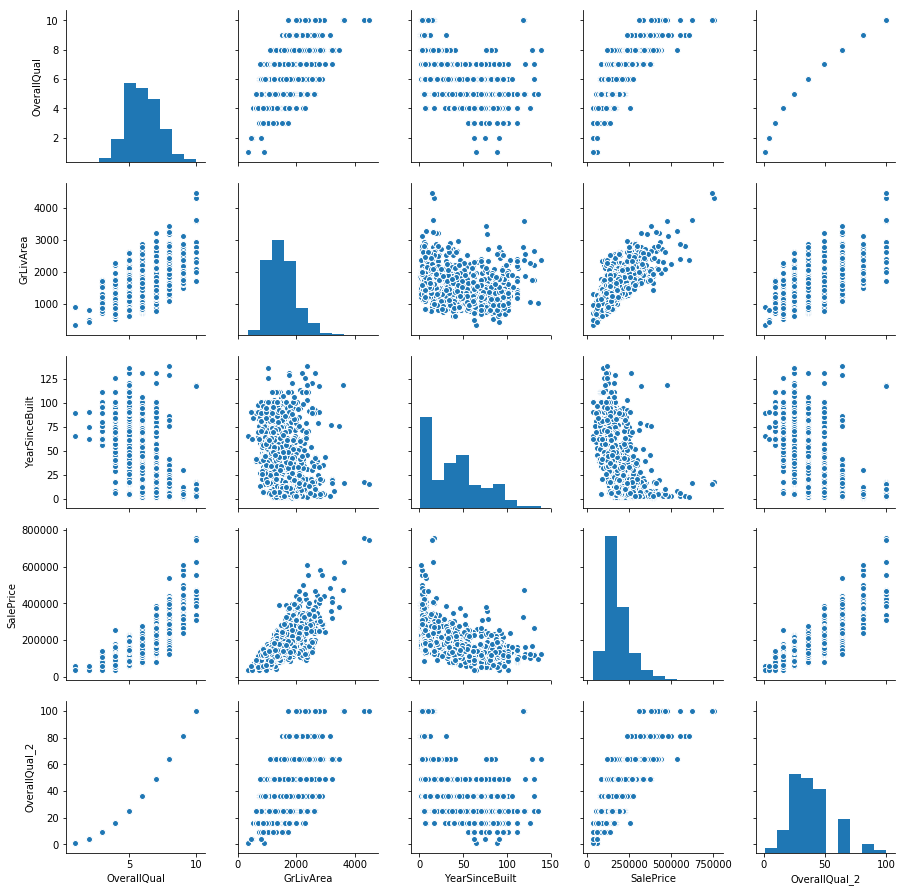

In [19]:
sns.pairplot(train.loc[:,["OverallQual","GrLivArea","YearSinceBuilt","SalePrice","OverallQual_2"]])

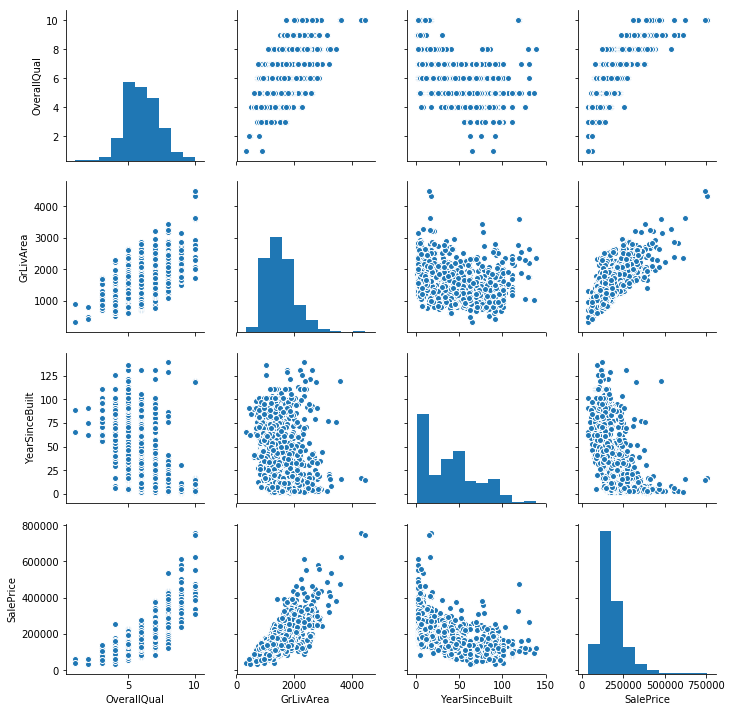

In [20]:
sns.pairplot(train.loc[:,["OverallQual","GrLivArea","YearSinceBuilt","SalePrice"]])

In [21]:
train = np.log1p(train)
test = np.log1p(test)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


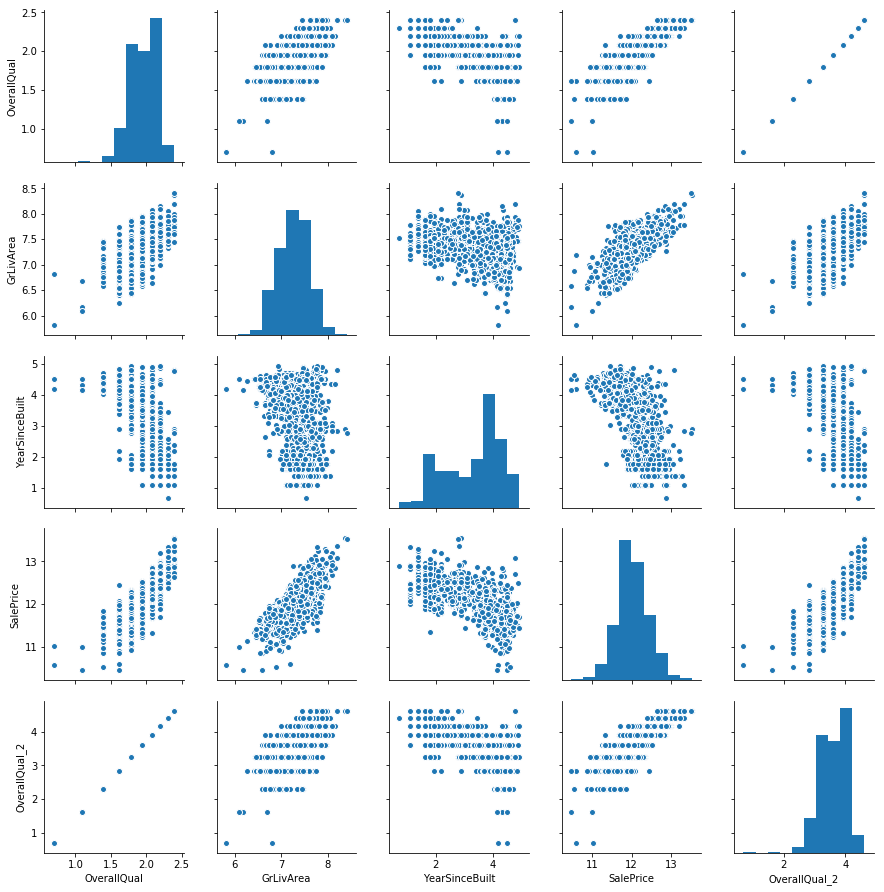

In [22]:
sns.pairplot(train.loc[:,["OverallQual","GrLivArea","YearSinceBuilt","SalePrice","OverallQual_2"]])

In [23]:
train = train[~(train['OverallQual_2'] < 2)]

In [24]:
from sklearn.model_selection import train_test_split

X = train.loc[:,train.columns != "SalePrice"]
y = train.loc[:, ['SalePrice']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [25]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.0005)
reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
print("ラッソ回帰でのRMSE:",np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

ラッソ回帰でのRMSE: 0.1034772593462987


#